## Setup

In [1]:
using PyCall
using SoleAudio
# using MFCC

af = pyimport("audioflux")
librosa = pyimport("librosa")
scipy= pyimport("scipy")
np = pyimport("numpy")

sr_src = 16000
x, sr = librosa.load("/home/riccardopasini/Documents/Aclai/Datasets/SpcDS/SpcDS_gender_1000_60_100/WavFiles/common_voice_en_23616312.wav", sr=sr_src, mono=true)
FFTLength = 256
mel_num = 26

# convert to Float64
# x = Float64.(x)

ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


ArgumentError: ArgumentError: Package MFCC not found in current path.
- Run `import Pkg; Pkg.add("MFCC")` to install the MFCC package.

# Mel spectrogram

### SoleAudio

In [2]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=:false,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:power,
    # mel
    mel_style=:htk,
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:bandwidth,
    frequency_scale=:mel,
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
mel_spectrogram(data, setup)

data.mel_spectrogram

749×26 adjoint(::Matrix{Float64}) with eltype Float64:
 0.00145865   0.0120549    0.0110139    …  3.55702e-6   7.8955e-7
 0.000968087  0.00609163   0.00527363      2.13445e-6   2.85168e-7
 0.000318082  0.00310803   0.00564505      1.4429e-6    1.94039e-7
 0.00202778   0.00941625   0.00808557      8.75643e-7   2.60428e-7
 0.00247062   0.012314     0.0114512       4.85245e-7   6.82688e-8
 0.00129579   0.00791248   0.00768026   …  4.9368e-7    2.2223e-7
 0.000398164  0.00216038   0.00425545      2.16657e-7   2.57794e-7
 0.000323854  0.000603713  0.00109851      3.74373e-7   1.87649e-7
 0.000573709  0.00163135   0.00169437      6.94803e-7   3.83215e-7
 0.000425578  0.0021829    0.00154443      1.13672e-6   1.16356e-7
 ⋮                                      ⋱               ⋮
 0.00082649   0.00871576   0.0119652    …  6.79841e-7   1.10627e-7
 0.000145481  0.00466538   0.00710006      4.53626e-7   1.76455e-8
 0.0020231    0.0153771    0.016203        8.08921e-8   6.90241e-9
 0.00250308   0.01

### Matlab

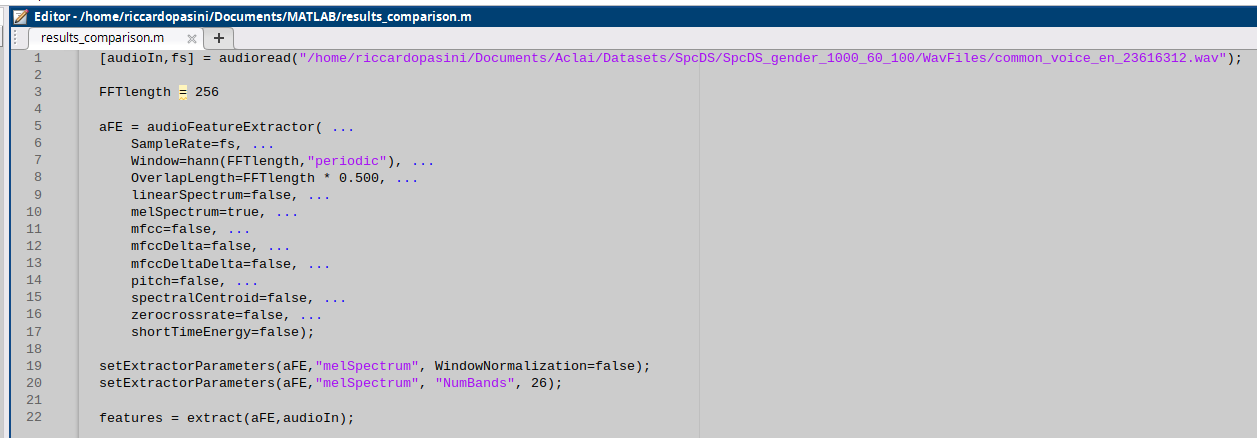

Results cutted to match jupiter view

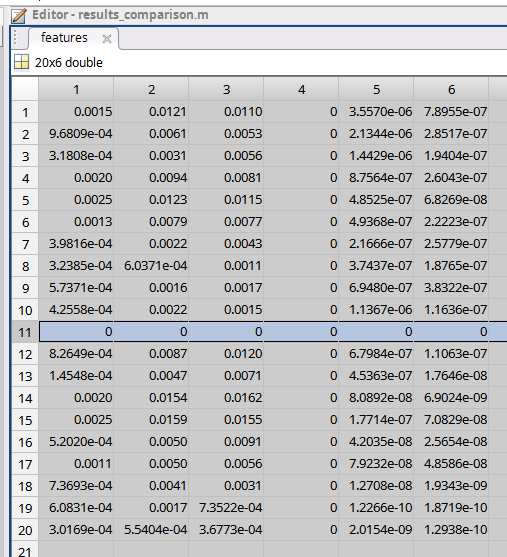

### AudioFlux

In [3]:
m_bft_obj = af.BFT(
    num=mel_num,
    radix2_exp=Int64(log2(FFTLength)),
    samplate=sr,
    low_fre=0.0,
    high_fre=sr / 2,
    window_type=af.type.WindowType.HANN,
    slide_length=round(Integer, FFTLength * 0.500),
    scale_type=af.type.SpectralFilterBankScaleType.MEL,
    style_type=af.type.SpectralFilterBankStyleType.SLANEY,
    normal_type=af.type.SpectralFilterBankNormalType.BAND_WIDTH,
    data_type=af.type.SpectralDataType.POWER,
    is_reassign=false
)
m_spec_arr = m_bft_obj.bft(x, result_type=1)
m_spec_arr'

749

### Librosa

In [4]:
S = librosa.feature.melspectrogram(
    y=x,
    sr=sr,
    n_fft=FFTLength,
    hop_length=Int(round(FFTLength * 0.500)),
    win_length=FFTLength,
    # window=scipy.signal.windows.hann,
    power=2, # 1: magnitude, 2: power
    n_mels=mel_num,
    htk=true
    )

S[:, 2:end-1]'

749×26 adjoint(::Matrix{Float64}) with eltype Float64:
 0.00145865   0.0120549    0.0110139    …  3.55702e-6   7.8955e-7
 0.000968087  0.00609163   0.00527363      2.13445e-6   2.85168e-7
 0.000318082  0.00310803   0.00564504      1.4429e-6    1.94039e-7
 0.00202778   0.00941625   0.00808557      8.75643e-7   2.60428e-7
 0.00247062   0.012314     0.0114512       4.85245e-7   6.82688e-8
 0.00129579   0.00791248   0.00768026   …  4.9368e-7    2.2223e-7
 0.000398164  0.00216038   0.00425545      2.16657e-7   2.57794e-7
 0.000323854  0.000603713  0.00109851      3.74373e-7   1.87649e-7
 0.000573709  0.00163135   0.00169437      6.94803e-7   3.83215e-7
 0.000425578  0.0021829    0.00154443      1.13672e-6   1.16356e-7
 ⋮                                      ⋱               ⋮
 0.000826489  0.00871576   0.0119652    …  6.79841e-7   1.10627e-7
 0.000145481  0.00466538   0.00710006      4.53626e-7   1.76455e-8
 0.0020231    0.0153771    0.016203        8.08921e-8   6.90241e-9
 0.00250308   0.01

# Mfcc 

### SoleAudio

In [2]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=:false,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:power,
    # mel
    mel_style=:htk,
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:bandwidth,
    frequency_scale=:mel,
    # mfcc
    num_coeffs = 13,
    rectification = :log,
    log_energy_pos = :none,
    delta_window_length = 9
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
mel_spectrogram(data, setup)
_mfcc(data, setup)

data.mfcc_coeffs

749×13 adjoint(::Matrix{Float64}) with eltype Float64:
 -10.8304   5.2289   -5.30384   …   0.127033   -0.568815    -0.162314
 -11.5883   5.85133  -5.61507       0.0665725  -0.422973    -0.250987
 -12.6946   6.33444  -5.61826       0.354477   -0.677017    -0.220679
 -14.1015   6.95132  -4.25116       0.794939   -0.567001    -0.200188
 -15.5788   7.74248  -3.72932       0.408677    0.00621792  -0.389695
 -16.6414   7.35256  -3.70665   …  -0.0232314  -0.26227     -0.322064
 -18.1472   7.64622  -3.72862       0.0357851  -0.388704     0.0762135
 -19.9316   7.40039  -3.13284       0.418804   -0.095727     0.316031
 -20.5183   6.80086  -2.09107      -0.0184889  -0.0896642    0.0960713
 -22.016    5.86285  -1.35099      -0.289847    0.205307    -0.871076
   ⋮                            ⋱   ⋮                       
 -16.6031   7.18781  -4.00703   …  -0.0154496  -0.597973     0.0708924
 -17.3399   7.26325  -4.39301      -0.0929925  -0.393874     0.0100958
 -18.0183   8.72281  -4.01924       0.03

### Matlab

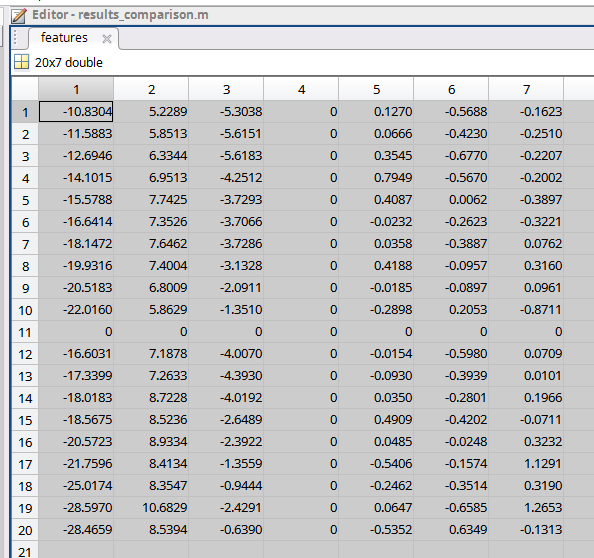

### AudioFlux

In [11]:
m_bft_obj = af.BFT(
    num=mel_num,
    radix2_exp=Int64(log2(FFTLength)),
    samplate=sr,
    low_fre=0.0,
    high_fre=sr / 2,
    window_type=af.type.WindowType.HANN,
    slide_length=round(Integer, FFTLength * 0.500),
    scale_type=af.type.SpectralFilterBankScaleType.MEL,
    style_type=af.type.SpectralFilterBankStyleType.SLANEY,
    normal_type=af.type.SpectralFilterBankNormalType.BAND_WIDTH,
    data_type=af.type.SpectralDataType.POWER,
    is_reassign=false
)
m_spec_arr = m_bft_obj.bft(x, result_type=1)

# m_spec_arr = Float32.(data.mel_spectrogram')

m_xxcc_obj = af.XXCC(num=m_bft_obj.num)
m_xxcc_obj.set_time_length(time_length=length(m_spec_arr[2, :]))
m_spectral_obj = af.Spectral(
    num=m_bft_obj.num,
    fre_band_arr=m_bft_obj.get_fre_band_arr())
m_n_time = length(m_spec_arr[2, :])
m_spectral_obj.set_time_length(m_n_time)
m_energy_arr = m_spectral_obj.energy(m_spec_arr)
mfcc_arr, m_delta_arr, m_deltadelta_arr = m_xxcc_obj.xxcc_standard(
    m_spec_arr,
    m_energy_arr,
    cc_num=13,
    delta_window_length=9,
    energy_type=af.type.CepstralEnergyType.IGNORE,
    rectify_type=af.type.CepstralRectifyType.LOG
)
mfcc_arr'

749×13 adjoint(::Matrix{Float32}) with eltype Float32:
 -10.8304  5.2289   -5.30383    …   0.127032   -0.568816    -0.162312
 -11.5883  5.85133  -5.61507        0.066571   -0.422974    -0.250984
 -12.6946  6.33444  -5.61826        0.354475   -0.677018    -0.220677
 -14.1015  6.95132  -4.25116        0.794937   -0.567002    -0.200185
 -15.5788  7.74248  -3.72932        0.408675    0.00621731  -0.389692
 -16.6414  7.35256  -3.70665    …  -0.0232334  -0.262271    -0.322061
 -18.1472  7.64622  -3.72862        0.0357826  -0.388706     0.0762172
 -19.9316  7.40039  -3.13284        0.418802   -0.0957282    0.316034
 -20.5183  6.80086  -2.09107       -0.018491   -0.0896655    0.0960752
 -22.016   5.86285  -1.35099       -0.289849    0.205306    -0.871072
   ⋮                            ⋱   ⋮                       
 -16.6031  7.18781  -4.00703    …  -0.0154518  -0.597974     0.0708959
 -17.3399  7.26325  -4.39301       -0.0929949  -0.393875     0.0100987
 -17.9867  8.67824  -3.97491        0.07

### Librosa

In [7]:
M = librosa.feature.mfcc(
    y=xlog, 
    sr=sr,
    n_mfcc=13,
    dct_type=2,
    norm="ortho",
    lifter=0,
    n_fft=FFTLength,
    hop_length=Int(round(FFTLength * 0.500)),
    win_length=FFTLength,
    # window=scipy.signal.windows.hann,
    power=2,
    n_mels=mel_num,
    htk=true,
    )

M[:, 2:end-1]'

749×13 adjoint(::Matrix{Float64}) with eltype Float64:
 -108.304  52.289   -53.0384    8.23464  …   1.27033    -5.68815    -1.62314
 -115.883  58.5133  -56.1507    5.88979      0.665725   -4.22973    -2.50987
 -126.946  63.3444  -56.1826    4.3585       3.54477    -6.77017    -2.20679
 -141.015  69.5132  -42.5116    8.76118      7.94939    -5.67001    -2.00188
 -155.788  77.4248  -37.2932    8.98652      4.08677     0.0621794  -3.89695
 -166.414  73.5256  -37.0665    4.61355  …  -0.232314   -2.6227     -3.22064
 -181.472  76.4622  -37.2862   -1.01112      0.357851   -3.88704     0.762135
 -199.316  74.0039  -31.3284   -6.71895      4.18804    -0.95727     3.16031
 -205.183  68.0086  -20.9107   -1.02538     -0.184889   -0.896642    0.960713
 -220.16   58.6285  -13.5099    3.72242     -2.89847     2.05307    -8.71076
    ⋮                                    ⋱   ⋮                      
 -166.031  71.8781  -40.0703   20.3145   …  -0.154496   -5.97973     0.708924
 -172.998  72.0666  -43.36

### Mfcc.jl

In [5]:
mfccjl, powspecjl, infojl = mfcc(
    x, 
    sr,
    wintime=FFTLength / sr,
    steptime=(round(FFTLength * 0.500)) / sr,
    numcep=13,
    preemph=1., 
    lifterexp=-22, 
    nbands=26, 
    minfreq=0.0, 
    maxfreq=sr/2, 
    fbtype=:htkmel, 
    bwidth=1.0, 
    modelorder=0, 
    dcttype=2, 
    dither=false, 
    sumpower=false, 
    usecmp=false
    )

mfccjl

749×13 Matrix{Float64}:
 38.3648   -13.566     -61.1094  …    5.55918   -18.9898    -3.85106
 37.2008   -10.1012    -61.3491       2.7894    -10.5436    -4.77903
 34.5449    -7.05835   -62.7767      10.103     -19.5218    -5.20887
 31.411     -2.79768   -48.5915      25.4202    -13.4389    -2.69715
 27.7808     0.657756  -45.6112      12.365      -0.5752    -9.65639
 25.4684    -0.228338  -44.8023  …   -2.56298    -5.57726   -6.47569
 21.8428     0.978742  -45.4218      -4.95503   -10.0769    -0.315418
 17.5258    -1.00662   -42.339        8.9329     -2.51399    6.68699
 16.427     -3.74486   -29.5409      -2.4868     -1.71786    1.3724
 12.7863    -9.76215   -23.7468      -8.69666     7.10114  -25.279
  ⋮                              ⋱    ⋮                    
 25.1446    -1.52336   -45.7989  …    3.2421    -18.5607     2.85491
 23.585      1.56351   -49.9271      10.6469     -7.32849    6.70727
 21.6217     7.61926   -47.8796       2.22174    -6.97741    7.53366
 20.5401     5.12197 

# Delta

### SoleAudio
filt(b, 1.0, x)     #:matlab setting

In [18]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=:false,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:power,
    # mel
    mel_style=:htk,
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:bandwidth,
    frequency_scale=:mel,
    # mfcc
    num_coeffs = 13,
    rectification = :log,
    log_energy_pos = :none,
    delta_window_length = 9,
    delta_matrix = :standard
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
mel_spectrogram(data, setup)
_mfcc(data, setup)

data.mfcc_delta

749×13 Matrix{Float64}:
 -1.44405  0.697187   -0.707178    0.109795   …  -0.075842     -0.0216419
 -2.62814  1.30307    -1.27906     0.160877      -0.113278     -0.0496963
 -3.57347  1.77832    -1.6642      0.171909      -0.170487     -0.0653435
 -4.28323  2.12467    -1.67978     0.227115      -0.190461     -0.0709025
 -4.71991  2.3448     -1.48408     0.256121      -0.115105     -0.0950562
 -4.77898  2.25486    -1.16104     0.196867   …  -0.0757543    -0.0972027
 -4.4841   1.95899    -0.717382    0.0472377     -0.0445196    -0.03551
 -3.82224  1.37547    -0.0699976  -0.175125       0.0387355     0.0556178
 -2.57421  0.465329    0.820717   -0.299177       0.12599       0.106883
 -2.64701  0.0749087   0.99584    -0.219263       0.16076      -0.00105873
  ⋮                                           ⋱                
 -1.35179  1.23173     0.277761    0.458554   …  -0.157449     -0.125994
 -1.52032  1.23428     0.10237     0.694914      -0.124234     -0.126549
 -1.62777  1.32244     0.061

### Matlab

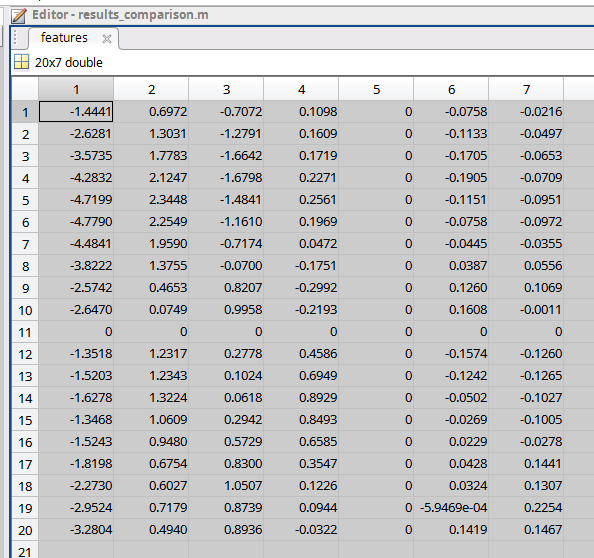

### AudioFlux

In [34]:
m_bft_obj = af.BFT(
    num=mel_num,
    radix2_exp=Int64(log2(FFTLength)),
    samplate=sr,
    low_fre=0.0,
    high_fre=sr / 2,
    window_type=af.type.WindowType.HANN,
    slide_length=round(Integer, FFTLength * 0.500),
    scale_type=af.type.SpectralFilterBankScaleType.MEL,
    style_type=af.type.SpectralFilterBankStyleType.SLANEY,
    normal_type=af.type.SpectralFilterBankNormalType.BAND_WIDTH,
    data_type=af.type.SpectralDataType.POWER,
    is_reassign=false
)
m_spec_arr = m_bft_obj.bft(x, result_type=1)

m_xxcc_obj = af.XXCC(num=m_bft_obj.num)
m_xxcc_obj.set_time_length(time_length=length(m_spec_arr[2, :]))
m_spectral_obj = af.Spectral(
    num=m_bft_obj.num,
    fre_band_arr=m_bft_obj.get_fre_band_arr())
m_n_time = length(m_spec_arr[2, :])
m_spectral_obj.set_time_length(m_n_time)
m_energy_arr = m_spectral_obj.energy(m_spec_arr)
mfcc_arr, m_delta_arr, m_deltadelta_arr = m_xxcc_obj.xxcc_standard(
    m_spec_arr,
    m_energy_arr,
    cc_num=13,
    delta_window_length=9,
    energy_type=af.type.CepstralEnergyType.IGNORE,
    rectify_type=af.type.CepstralRectifyType.LOG
)
m_delta_arr'

749×13 adjoint(::Matrix{Float32}) with eltype Float32:
 -1.44405  -0.385852  -0.906314  -0.433008   …   0.0352413    0.214375
 -1.5451   -0.378652  -0.936095  -0.479164       0.145224     0.29395
 -1.69262  -0.424872  -0.961967  -0.504571       0.193401     0.373259
 -1.8802   -0.48331   -0.811791  -0.314929       0.115897     0.303432
 -2.07717  -0.525549  -0.761581  -0.256239       0.134408     0.287062
 -2.21885  -0.683799  -0.868391  -0.373694   …  -0.0159801    0.0851939
 -2.41962  -0.795221  -0.942338  -0.481501       0.0714279    0.182701
 -2.65755  -1.00644   -1.00645   -0.573897       0.20853      0.2443
 -2.73577  -1.14505   -0.966608  -0.453331       0.0468605    0.105887
 -2.93547  -1.41989   -1.06158   -0.428478      -0.0792202   -0.126282
  ⋮                                          ⋱               
 -2.21375  -0.701934  -0.922363  -0.204092   …  -0.0913758    0.323789
 -2.31199  -0.765558  -1.0154    -0.273089      -0.0135611    0.43273
 -2.39823  -0.641572  -0.861278  -

### SoleAudio
filt(b, 1.0, x')'   #:audioflux setting

In [35]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=:false,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:power,
    # mel
    mel_style=:htk,
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:bandwidth,
    frequency_scale=:mel,
    # mfcc
    num_coeffs = 13,
    rectification = :log,
    log_energy_pos = :none,
    delta_window_length = 9,
    delta_matrix = :transposed
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
mel_spectrogram(data, setup)
_mfcc(data, setup)

data.mfcc_delta

749×13 adjoint(::Matrix{Float64}) with eltype Float64:
 -1.44405  -0.385852  -0.906314  …   0.77369      0.0352415   0.214375
 -1.5451   -0.378652  -0.936096      0.880369     0.145224    0.29395
 -1.69262  -0.424872  -0.961967      0.9187       0.193402    0.373259
 -1.8802   -0.48331   -0.811791      0.709012     0.115897    0.303432
 -2.07717  -0.525549  -0.761581      0.575777     0.134409    0.287062
 -2.21885  -0.683799  -0.868391  …   0.454729    -0.0159798   0.0851939
 -2.41962  -0.795222  -0.942339      0.515398     0.0714283   0.182701
 -2.65755  -1.00644   -1.00645       0.536582     0.20853     0.2443
 -2.73577  -1.14504   -0.966608      0.277308     0.0468607   0.105887
 -2.93547  -1.41989   -1.06158       0.0596535   -0.07922    -0.126282
  ⋮                              ⋱   ⋮                       
 -2.21375  -0.701934  -0.922363  …   0.475421    -0.0913752   0.323789
 -2.31199  -0.765558  -1.0154        0.517864    -0.0135607   0.432731
 -2.40244  -0.638786  -0.864836  

# Log Energy

### SoleAudio

In [33]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=:false,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:power,
    # mel
    mel_style=:htk,
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:bandwidth,
    frequency_scale=:mel,
    # mfcc
    num_coeffs = 13,
    rectification = :log,
    log_energy_source = :standard,
    log_energy_pos = :replace,
    delta_window_length = 9
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
mel_spectrogram(data, setup)
_mfcc(data, setup)

data.mfcc_coeffs[:,1]

749-element Vector{Float64}:
  1.8942457361703688
  1.7725620414109489
  1.4847075362769575
  0.6781487996717441
  0.11152738127840268
 -0.5164502379268161
 -1.018288094696488
 -1.444601183359552
 -2.6547787588919896
 -3.7244744173552213
  ⋮
 -0.4864692853958704
 -0.46439396609920774
 -0.3862480011983384
 -0.40933708590704054
 -0.6182448622191861
 -1.550190885472392
 -2.537770870460166
 -4.167422460084754
 -4.750178922796984

### AudioFlux

In [29]:
m_bft_obj = af.BFT(
    num=mel_num,
    radix2_exp=Int64(log2(FFTLength)),
    samplate=sr,
    low_fre=0.0,
    high_fre=sr / 2,
    window_type=af.type.WindowType.HANN,
    slide_length=round(Integer, FFTLength * 0.500),
    scale_type=af.type.SpectralFilterBankScaleType.MEL,
    style_type=af.type.SpectralFilterBankStyleType.SLANEY,
    normal_type=af.type.SpectralFilterBankNormalType.BAND_WIDTH,
    data_type=af.type.SpectralDataType.POWER,
    is_reassign=false
)
m_spec_arr = m_bft_obj.bft(x, result_type=1)

m_xxcc_obj = af.XXCC(num=m_bft_obj.num)
m_xxcc_obj.set_time_length(time_length=length(m_spec_arr[2, :]))
m_spectral_obj = af.Spectral(
    num=m_bft_obj.num,
    fre_band_arr=m_bft_obj.get_fre_band_arr())
m_n_time = length(m_spec_arr[2, :])
m_spectral_obj.set_time_length(m_n_time)
m_energy_arr = m_spectral_obj.energy(m_spec_arr)
mfcc_arr, m_delta_arr, m_deltadelta_arr = m_xxcc_obj.xxcc_standard(
    m_spec_arr,
    m_energy_arr,
    cc_num=13,
    delta_window_length=9,
    energy_type=af.type.CepstralEnergyType.REPLACE,
    rectify_type=af.type.CepstralRectifyType.LOG
)
mfcc_arr'[:,1]

749-element Vector{Float32}:
  -4.1348476
  -4.139962
  -4.627077
  -5.751109
  -6.269056
  -8.866862
  -9.523477
 -10.657206
 -12.410045
 -14.690201
   ⋮
  -8.171363
  -7.924935
  -7.570081
  -7.194676
  -7.62654
  -9.508778
 -13.352563
 -14.774373
 -16.012177

### SoleAudio with modded log energy
from Mel Spectrogram instead after windowing like Matlab

In [32]:
setup = signal_setup(
    sr=sr,
    # fft
    window_type=[:hann, :periodic],
    window_length=FFTLength,
    overlap_length=Int(round(FFTLength * 0.500)),
    window_norm=:false,
    # spectrum
    frequency_range=Int[0, sr / 2],
    spectrum_type=:power,
    # mel
    mel_style=:htk,
    mel_bands=mel_num,
    filterbank_design_domain=:linear,
    filterbank_normalization=:bandwidth,
    frequency_scale=:mel,
    # mfcc
    num_coeffs = 13,
    rectification = :log,
    log_energy_source = :mfcc,
    log_energy_pos = :replace,
    delta_window_length = 9
)

data = signal_data(
    x=x
)

takeFFT(data, setup)
mel_spectrogram(data, setup)
_mfcc(data, setup)

data.mfcc_coeffs[:,1]

749-element Vector{Float64}:
  -4.1348478257922405
  -4.139962264017667
  -4.627077409530931
  -5.751108719018592
  -6.269055648102423
  -8.866861613287366
  -9.523476467139837
 -10.657205177183954
 -12.410044521735912
 -14.690200426475807
   ⋮
  -8.171362964552106
  -7.92493455371075
  -7.57008110420328
  -7.194675903894998
  -7.626540047321812
  -9.50877744703531
 -13.35256221377284
 -14.774372290038617
 -16.012175103874085

# Results

### AudioFlux

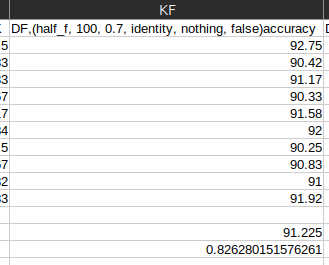

### SoleAudio with AudioFlux Delta behaviour

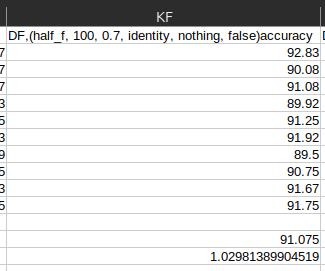

### SoleAudio with Matlab Delta behaviour

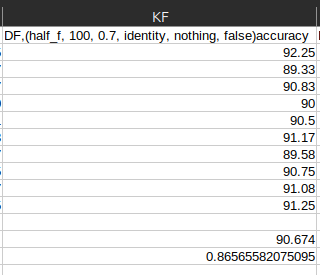

### SoleAudio with modded log energy from mel spectrogram like audioflux (and delta behaviour)

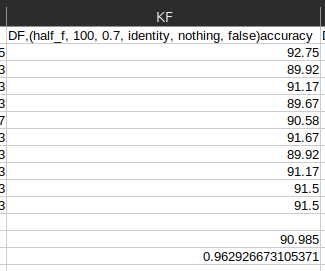

### SoleAudio no delta delta

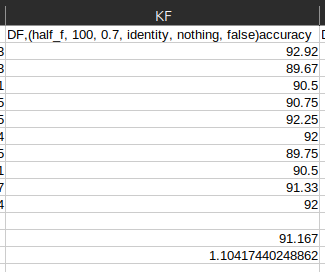

### SoleAudio only half spectrogram

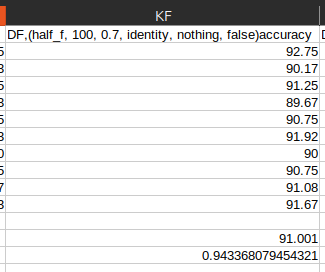

### SoleAudio append log energy

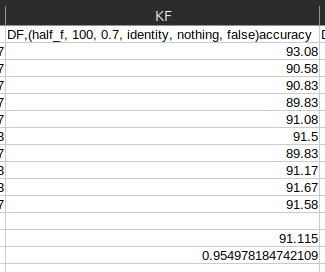

### SoleAudio with half mel spectrogram, no delta delta, and log append

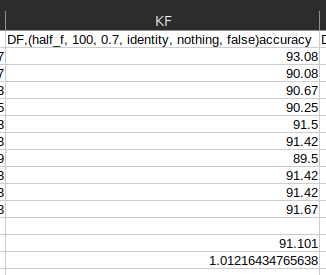

sentiment

speaker ID
speaker identification ( riconoscere ogni singola voce), avendo la chiave, come Siri.

esperimenti da lanciare: tenendo delta sbagliate
1 - log_energy append

rimetti log energy replace
2 - cava le ultime 13 bande di spettrogramma 
3 - esperimento con win e hop matlab standard
4 - esperimento senza deltadelta

In [11]:
println(eltype(x))
x1 = Float64.(x)
println(eltype(x1))

t=trim_audio(x)

Float32
Float64


UndefVarError: UndefVarError: `trim_audio` not defined